<Figure size 1400x800 with 0 Axes>

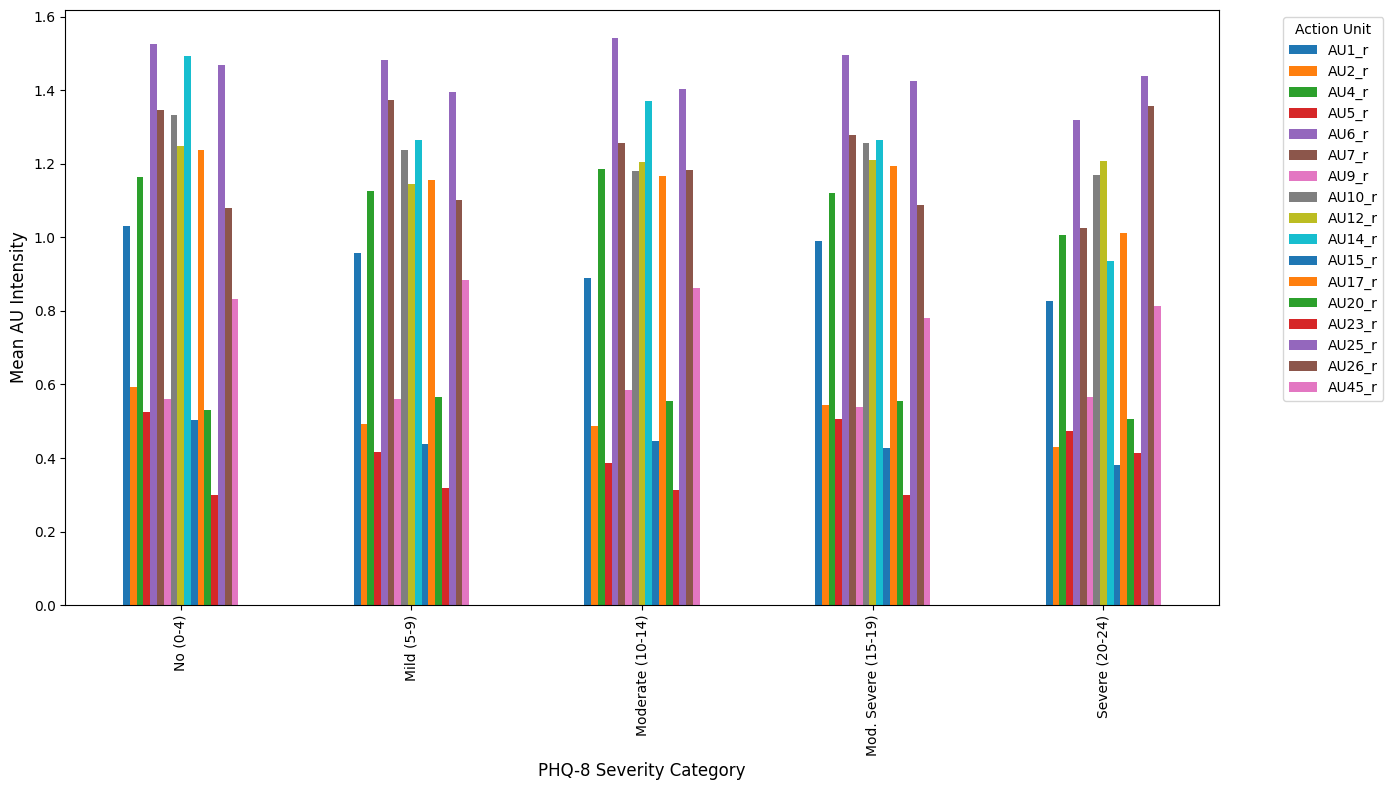

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Plot mean AU_r intensities across PHQ-8 severity categories.
"""

import matplotlib.pyplot as plt
import pandas as pd

# === Input your data ===
data = {
    "AU1_r":  [1.029976, 0.956534, 0.890781, 0.991126, 0.827498],
    "AU2_r":  [0.592596, 0.491614, 0.486546, 0.544224, 0.431108],
    "AU4_r":  [1.165264, 1.127479, 1.184981, 1.121986, 1.007642],
    "AU5_r":  [0.525711, 0.417388, 0.387558, 0.506685, 0.472824],
    "AU6_r":  [1.526764, 1.483552, 1.541491, 1.496784, 1.320121],
    "AU7_r":  [1.345671, 1.372596, 1.256108, 1.279511, 1.026758],
    "AU9_r":  [0.561247, 0.560582, 0.585285, 0.537883, 0.566147],
    "AU10_r": [1.333301, 1.238202, 1.180811, 1.255496, 1.169476],
    "AU12_r": [1.249267, 1.144422, 1.205592, 1.211484, 1.206570],
    "AU14_r": [1.494073, 1.265058, 1.370018, 1.264966, 0.935028],
    "AU15_r": [0.503745, 0.438533, 0.447667, 0.426546, 0.381174],
    "AU17_r": [1.236842, 1.155957, 1.166259, 1.193928, 1.011585],
    "AU20_r": [0.529922, 0.566781, 0.556434, 0.554068, 0.506759],
    "AU23_r": [0.299711, 0.318566, 0.312922, 0.298573, 0.413084],
    "AU25_r": [1.469958, 1.395945, 1.404437, 1.426092, 1.438783],
    "AU26_r": [1.080413, 1.101475, 1.184200, 1.087477, 1.357501],
    "AU45_r": [0.832362, 0.884931, 0.862756, 0.781801, 0.814409],
}

categories = [
    "No (0-4)",
    "Mild (5-9)",
    "Moderate (10-14)",
    "Mod. Severe (15-19)",
    "Severe (20-24)"
]

# Convert to DataFrame
df = pd.DataFrame(data, index=categories)

# === Plot setup ===
plt.figure(figsize=(14, 8))
df.plot(kind="bar", figsize=(14, 8))
#plt.title("Mean AU_r Intensities by PHQ-8 Severity Category", fontsize=16)
plt.ylabel("Mean AU Intensity", fontsize=12)
plt.xlabel("PHQ-8 Severity Category", fontsize=12)
plt.legend(title="Action Unit", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


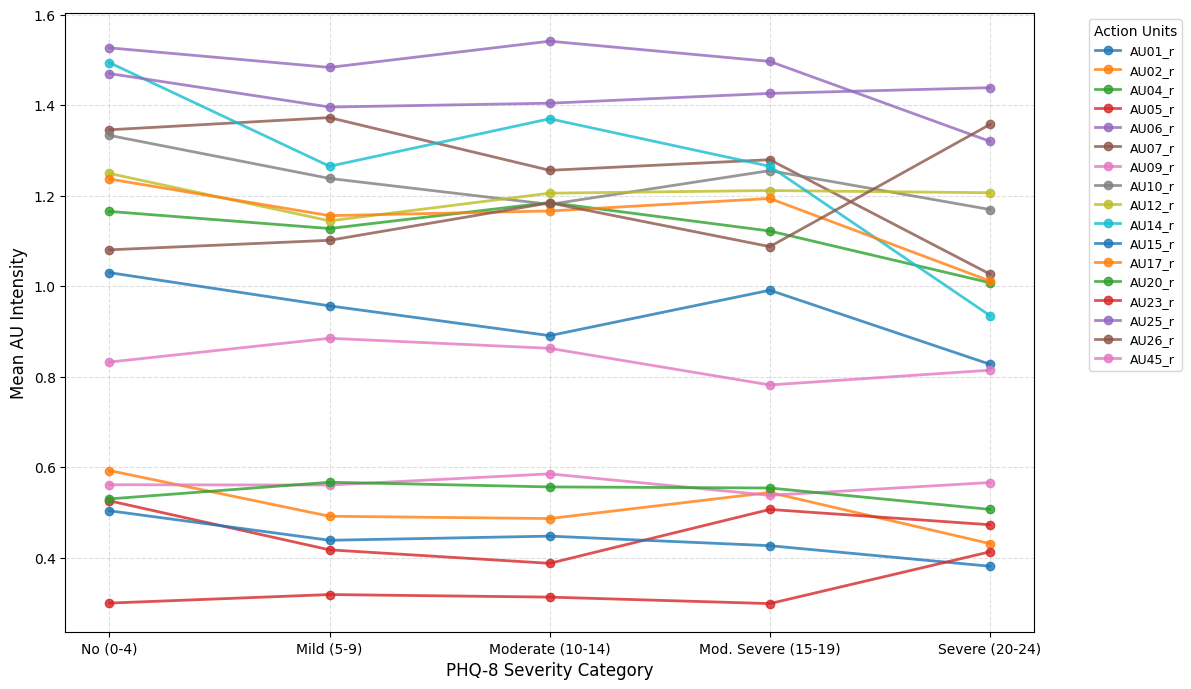

Rising AUs: ['AU09_r', 'AU23_r', 'AU26_r']
Falling AUs: ['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU25_r', 'AU45_r']


In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Plot AU_r intensity trends across PHQ-8 severity categories.
Each line represents one Action Unit, showing how mean intensity changes
with increasing depression severity.
"""

import pandas as pd
import matplotlib.pyplot as plt

# === Load your aggregated data ===
# group_means.csv should have PHQ categories as the index (rows)
df = pd.read_csv("group_means.csv", index_col=0)

# Ensure correct PHQ category order (just in case)
order = [
    "Real images with PHQ-8 score 0-4 (no depression)",
    "Real images with PHQ-8 score 5-9 (mild depression)",
    "Real images with PHQ-8 score 10-14 (moderate depression)",
    "Real images with PHQ-8 score 15-19 (moderately severe depression)",
    "Real images with PHQ-8 score 20-24 (severe depression)",
]
df = df.reindex(order)

# Transpose: rows = categories, columns = AU_r
df = df.T

# Clean up axis labels for readability
category_labels = ["No (0-4)", "Mild (5-9)", "Moderate (10-14)", "Mod. Severe (15-19)", "Severe (20-24)"]
df.columns = category_labels

# === Plot ===
plt.figure(figsize=(12, 7))
for au in df.index:
    plt.plot(category_labels, df.loc[au], marker="o", linewidth=2, alpha=0.8, label=au)

#plt.title("Trends of Mean AU_r Intensities Across PHQ-8 Severity Levels", fontsize=16)
plt.xlabel("PHQ-8 Severity Category", fontsize=12)
plt.ylabel("Mean AU Intensity", fontsize=12)

plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="Action Units", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=9)
plt.tight_layout()
plt.show()

slopes = df.diff(axis=1).sum(axis=1)
rising = slopes[slopes > 0].index.tolist()
falling = slopes[slopes < 0].index.tolist()

print("Rising AUs:", rising)
print("Falling AUs:", falling)



Top movers (in order):
           score  abs_slope
AU14_r  0.768966   0.111818
AU26_r  0.470534   0.054018
AU07_r  0.419569   0.073091
AU01_r  0.403169   0.037037
AU06_r  0.322522   0.040006
AU10_r  0.313195   0.031036
AU17_r  0.301199   0.041254
AU05_r  0.291142   0.001648
AU02_r  0.276845   0.027036
AU04_r  0.272626   0.032074


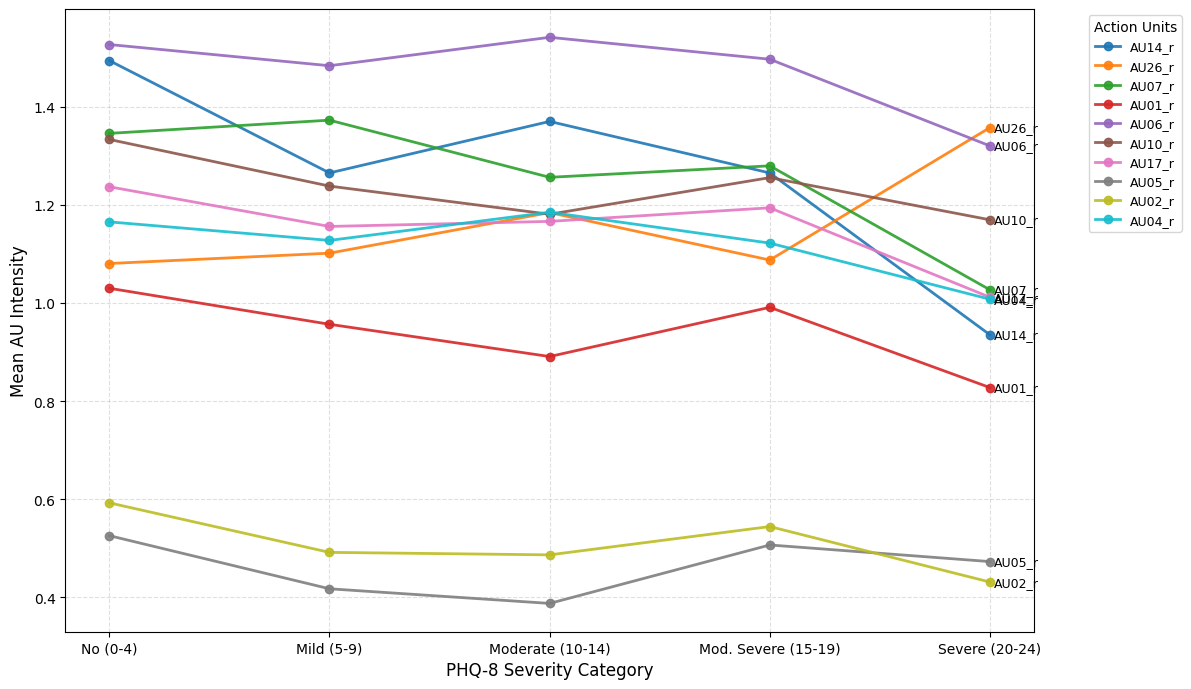

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Plot only the most significantly changing AU_r trends across PHQ-8 categories.

Ranking metric:
- CHANGE_METRIC = "total_variation": sum(|diffs|) across categories (default, robust)
- CHANGE_METRIC = "range": max - min across categories
- CHANGE_METRIC = "slope": absolute value of linear regression slope across categories

Ties are broken using absolute linear slope.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Config
# =========================
CSV_PATH = "group_means.csv"
TOP_N = 10
CHANGE_METRIC = "total_variation"   # "total_variation" | "range" | "slope"

PHQ_ORDER_FULL = [
    "Real images with PHQ-8 score 0-4 (no depression)",
    "Real images with PHQ-8 score 5-9 (mild depression)",
    "Real images with PHQ-8 score 10-14 (moderate depression)",
    "Real images with PHQ-8 score 15-19 (moderately severe depression)",
    "Real images with PHQ-8 score 20-24 (severe depression)",
]
PHQ_LABELS_SHORT = ["No (0-4)", "Mild (5-9)", "Moderate (10-14)", "Mod. Severe (15-19)", "Severe (20-24)"]

# =========================
# Load & shape
# =========================
df = pd.read_csv(CSV_PATH, index_col=0)

# Ensure row order is correct, then transpose so rows = AUs, cols = categories
df = df.reindex(PHQ_ORDER_FULL)
df = df.T
df.columns = PHQ_LABELS_SHORT

# =========================
# Scoring functions
# =========================
def change_score(series: pd.Series, metric: str = "total_variation") -> float:
    s = series.dropna().astype(float)
    if len(s) < 2:
        return 0.0
    if metric == "total_variation":
        # Sum of absolute consecutive changes across the ordered categories
        return float(np.nansum(np.abs(np.diff(s.values))))
    elif metric == "range":
        return float(np.nanmax(s.values) - np.nanmin(s.values))
    elif metric == "slope":
        # Linear slope magnitude vs category index 0..(k-1)
        x = np.arange(len(s))
        m, b = np.polyfit(x, s.values, 1)
        return float(abs(m))
    else:
        raise ValueError(f"Unknown CHANGE_METRIC: {metric}")

def slope_abs(series: pd.Series) -> float:
    s = series.dropna().astype(float)
    if len(s) < 2:
        return 0.0
    x = np.arange(len(s))
    m, b = np.polyfit(x, s.values, 1)
    return float(abs(m))

# =========================
# Rank AUs
# =========================
scores = df.apply(lambda col: change_score(col, CHANGE_METRIC), axis=1)
slopes = df.apply(slope_abs, axis=1)

ranking = (
    pd.DataFrame({"score": scores, "abs_slope": slopes})
    .sort_values(["score", "abs_slope"], ascending=False)
)

top_aus = ranking.head(TOP_N).index.tolist()
print("Top movers (in order):")
print(ranking.head(TOP_N))

# =========================
# Plot
# =========================
plt.figure(figsize=(12, 7))
for au in top_aus:
    plt.plot(df.columns.tolist(), df.loc[au].values, marker="o", linewidth=2, alpha=0.9, label=au)

# Annotate last point with AU label for readability
for au in top_aus:
    y = df.loc[au].values[-1]
    x = df.columns.tolist()[-1]
    # Slight right shift by index value to avoid overlap in text anchor
    plt.text(len(df.columns)-0.98, y, au, fontsize=9, va="center")

#plt.title(f"Most Changing AU_r Intensities Across PHQ-8 (Top {TOP_N}, metric: {CHANGE_METRIC})", fontsize=15)
plt.xlabel("PHQ-8 Severity Category", fontsize=12)
plt.ylabel("Mean AU Intensity", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="Action Units", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=9)
plt.tight_layout()
plt.show()


Top movers (in order):
           score  abs_slope
AU14_r  0.768966   0.111818
AU26_r  0.470534   0.054018
AU07_r  0.419569   0.073091
AU01_r  0.403169   0.037037
AU06_r  0.322522   0.040006


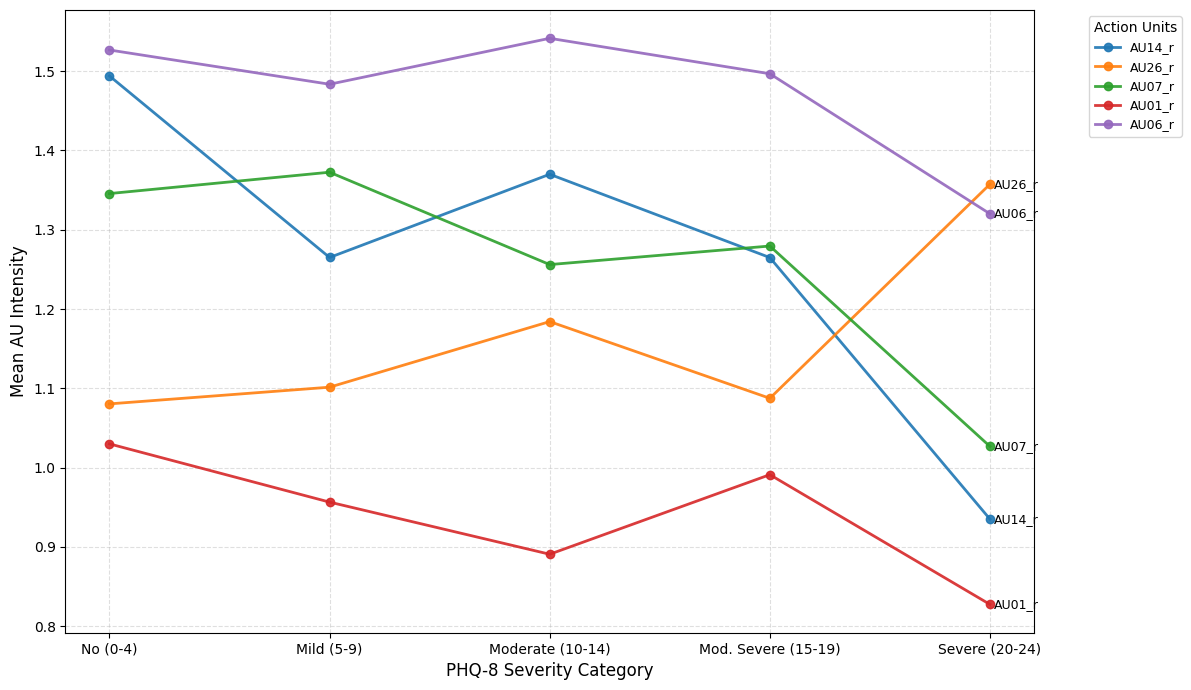

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Plot only the most significantly changing AU_r trends across PHQ-8 categories.

Ranking metric:
- CHANGE_METRIC = "total_variation": sum(|diffs|) across categories (default, robust)
- CHANGE_METRIC = "range": max - min across categories
- CHANGE_METRIC = "slope": absolute value of linear regression slope across categories

Ties are broken using absolute linear slope.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Config
# =========================
CSV_PATH = "group_means.csv"
TOP_N = 5
CHANGE_METRIC = "total_variation"   # "total_variation" | "range" | "slope"

PHQ_ORDER_FULL = [
    "Real images with PHQ-8 score 0-4 (no depression)",
    "Real images with PHQ-8 score 5-9 (mild depression)",
    "Real images with PHQ-8 score 10-14 (moderate depression)",
    "Real images with PHQ-8 score 15-19 (moderately severe depression)",
    "Real images with PHQ-8 score 20-24 (severe depression)",
]
PHQ_LABELS_SHORT = ["No (0-4)", "Mild (5-9)", "Moderate (10-14)", "Mod. Severe (15-19)", "Severe (20-24)"]

# =========================
# Load & shape
# =========================
df = pd.read_csv(CSV_PATH, index_col=0)

# Ensure row order is correct, then transpose so rows = AUs, cols = categories
df = df.reindex(PHQ_ORDER_FULL)
df = df.T
df.columns = PHQ_LABELS_SHORT

# =========================
# Scoring functions
# =========================
def change_score(series: pd.Series, metric: str = "total_variation") -> float:
    s = series.dropna().astype(float)
    if len(s) < 2:
        return 0.0
    if metric == "total_variation":
        # Sum of absolute consecutive changes across the ordered categories
        return float(np.nansum(np.abs(np.diff(s.values))))
    elif metric == "range":
        return float(np.nanmax(s.values) - np.nanmin(s.values))
    elif metric == "slope":
        # Linear slope magnitude vs category index 0..(k-1)
        x = np.arange(len(s))
        m, b = np.polyfit(x, s.values, 1)
        return float(abs(m))
    else:
        raise ValueError(f"Unknown CHANGE_METRIC: {metric}")

def slope_abs(series: pd.Series) -> float:
    s = series.dropna().astype(float)
    if len(s) < 2:
        return 0.0
    x = np.arange(len(s))
    m, b = np.polyfit(x, s.values, 1)
    return float(abs(m))

# =========================
# Rank AUs
# =========================
scores = df.apply(lambda col: change_score(col, CHANGE_METRIC), axis=1)
slopes = df.apply(slope_abs, axis=1)

ranking = (
    pd.DataFrame({"score": scores, "abs_slope": slopes})
    .sort_values(["score", "abs_slope"], ascending=False)
)

top_aus = ranking.head(TOP_N).index.tolist()
print("Top movers (in order):")
print(ranking.head(TOP_N))

# =========================
# Plot
# =========================
plt.figure(figsize=(12, 7))
for au in top_aus:
    plt.plot(df.columns.tolist(), df.loc[au].values, marker="o", linewidth=2, alpha=0.9, label=au)

# Annotate last point with AU label for readability
for au in top_aus:
    y = df.loc[au].values[-1]
    x = df.columns.tolist()[-1]
    # Slight right shift by index value to avoid overlap in text anchor
    plt.text(len(df.columns)-0.98, y, au, fontsize=9, va="center")

#plt.title(f"Most Changing AU_r Intensities Across PHQ-8 (Top {TOP_N}, metric: {CHANGE_METRIC})", fontsize=15)
plt.xlabel("PHQ-8 Severity Category", fontsize=12)
plt.ylabel("Mean AU Intensity", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="Action Units", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=9)
plt.tight_layout()
plt.show()

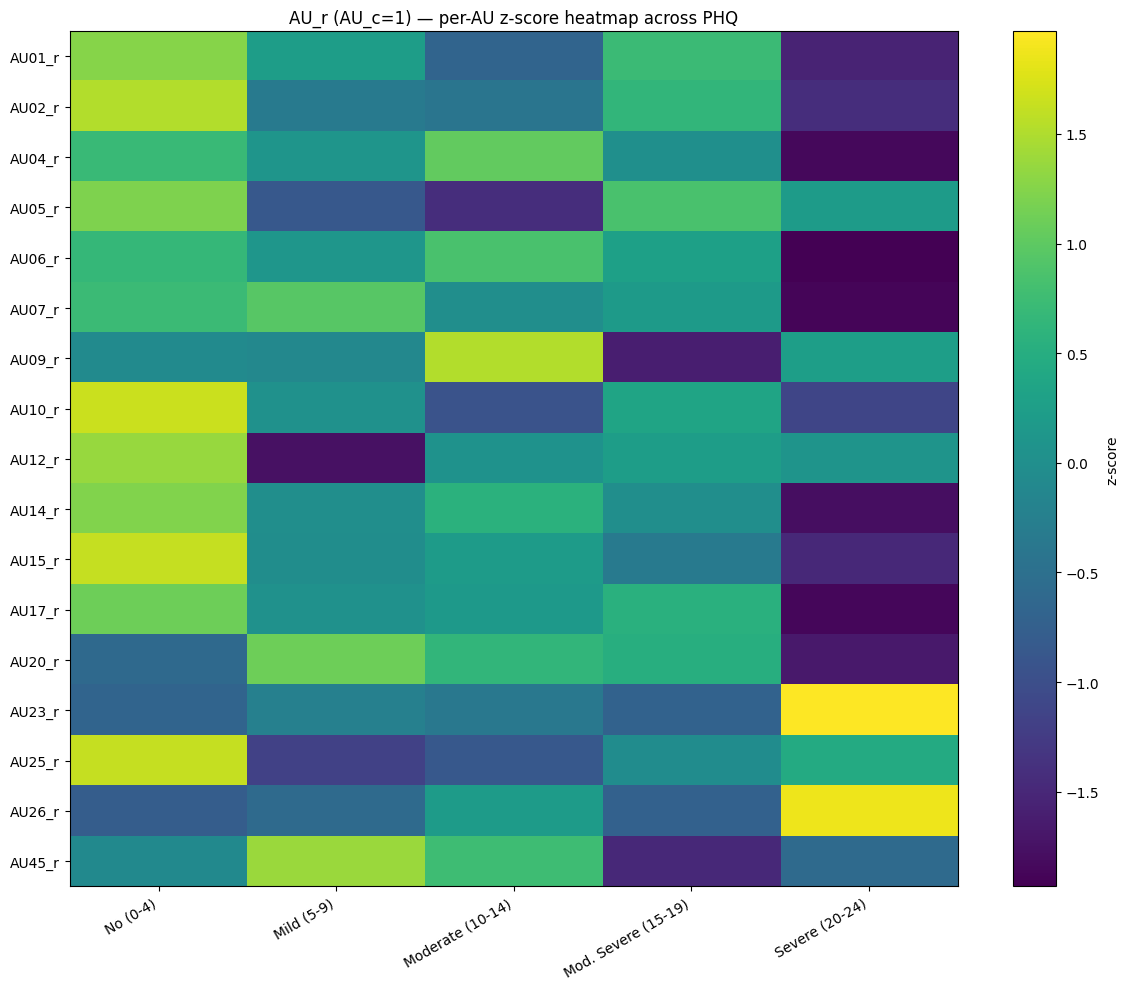

In [5]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

order = [
 "Real images with PHQ-8 score 0-4 (no depression)",
 "Real images with PHQ-8 score 5-9 (mild depression)",
 "Real images with PHQ-8 score 10-14 (moderate depression)",
 "Real images with PHQ-8 score 15-19 (moderately severe depression)",
 "Real images with PHQ-8 score 20-24 (severe depression)",
]
labels = ["No (0-4)","Mild (5-9)","Moderate (10-14)","Mod. Severe (15-19)","Severe (20-24)"]

df = pd.read_csv("group_means.csv", index_col=0).reindex(order)  # rows=PHQ, cols=AUs
M = df.T  # rows=AUs, cols=PHQ
Z = (M - M.mean(axis=1).values[:,None]) / M.std(axis=1, ddof=0).values[:,None]

plt.figure(figsize=(12,10))
plt.imshow(Z, aspect="auto")
plt.yticks(range(len(Z.index)), Z.index)
plt.xticks(range(len(labels)), labels, rotation=30, ha="right")
plt.title("AU_r (AU_c=1) — per-AU z-score heatmap across PHQ")
plt.colorbar(label="z-score")
plt.tight_layout(); plt.show()


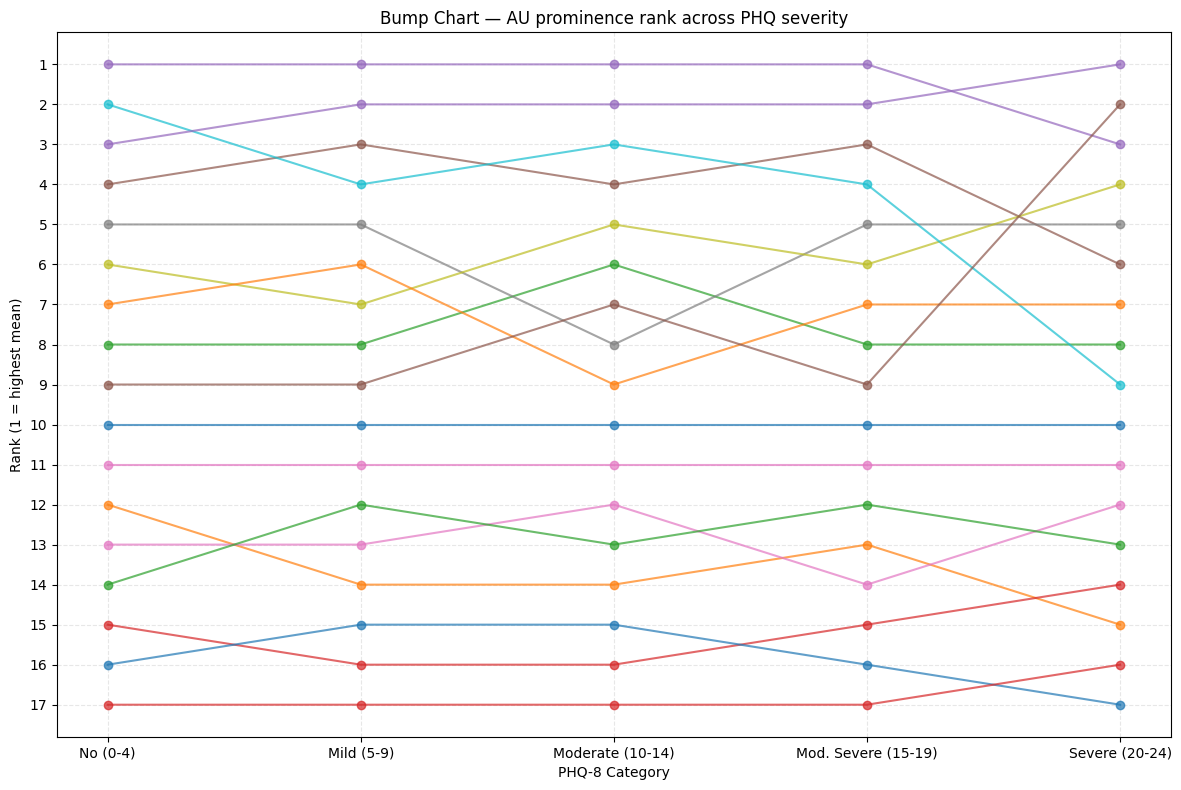

In [6]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

order = [
 "Real images with PHQ-8 score 0-4 (no depression)",
 "Real images with PHQ-8 score 5-9 (mild depression)",
 "Real images with PHQ-8 score 10-14 (moderate depression)",
 "Real images with PHQ-8 score 15-19 (moderately severe depression)",
 "Real images with PHQ-8 score 20-24 (severe depression)",
]
labels = ["No (0-4)","Mild (5-9)","Moderate (10-14)","Mod. Severe (15-19)","Severe (20-24)"]

G = pd.read_csv("group_means.csv", index_col=0).reindex(order).T  # rows=AU, cols=PHQ
ranks = G.rank(ascending=False, axis=0, method="dense")  # 1=strongest

plt.figure(figsize=(12,8))
x = np.arange(len(labels))
for au in ranks.index:
    plt.plot(x, ranks.loc[au], marker="o", alpha=0.7)
plt.gca().invert_yaxis()  # rank 1 at top
plt.xticks(x, labels, rotation=0)
plt.yticks(range(1, int(ranks.max().max())+1))
plt.title("Bump Chart — AU prominence rank across PHQ severity")
plt.xlabel("PHQ-8 Category"); plt.ylabel("Rank (1 = highest mean)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout(); plt.show()


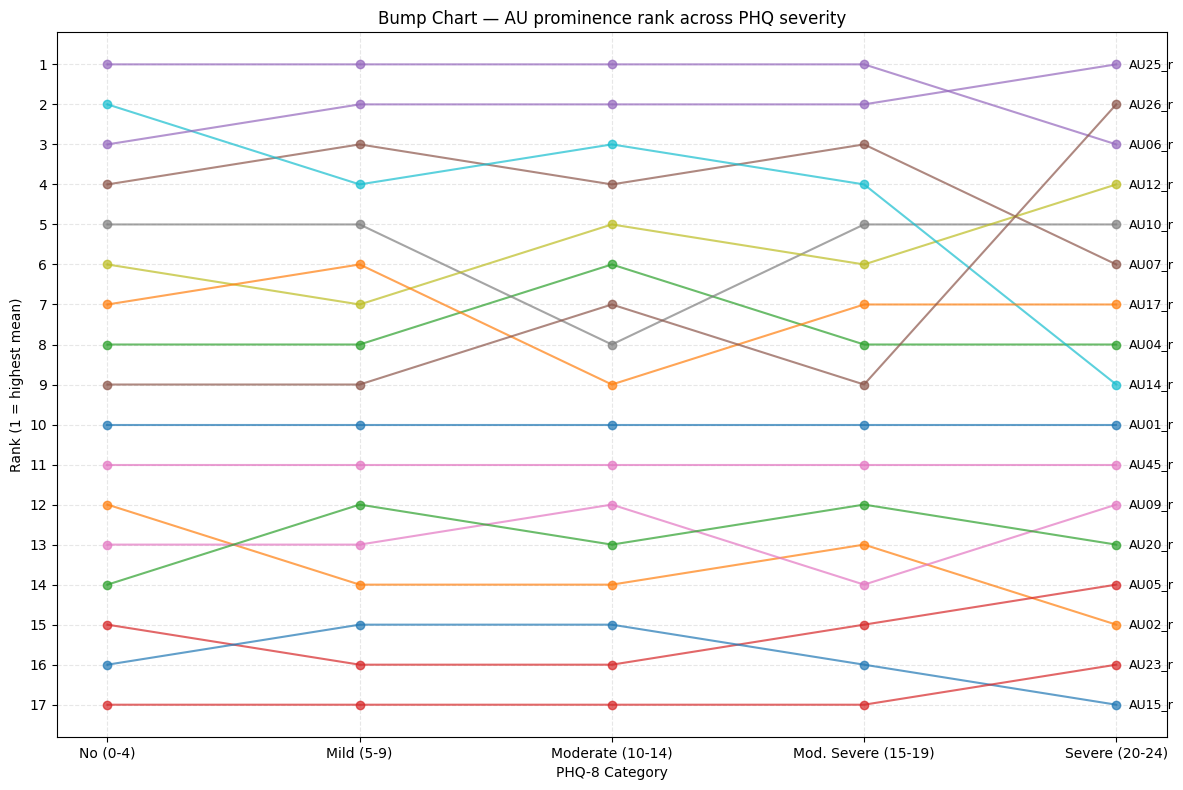

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

order = [
 "Real images with PHQ-8 score 0-4 (no depression)",
 "Real images with PHQ-8 score 5-9 (mild depression)",
 "Real images with PHQ-8 score 10-14 (moderate depression)",
 "Real images with PHQ-8 score 15-19 (moderately severe depression)",
 "Real images with PHQ-8 score 20-24 (severe depression)",
]
labels = ["No (0-4)","Mild (5-9)","Moderate (10-14)","Mod. Severe (15-19)","Severe (20-24)"]

G = pd.read_csv("group_means.csv", index_col=0).reindex(order).T
ranks = G.rank(ascending=False, axis=0, method="dense")

plt.figure(figsize=(12,8))
x = np.arange(len(labels))

for au in ranks.index:
    y = ranks.loc[au]
    plt.plot(x, y, marker="o", alpha=0.7)
    
    # Add label at the right end of each line
    plt.text(
        x[-1] + 0.05,      # slight push to the right
        y.iloc[-1],        # last rank position
        au,
        va="center",
        fontsize=9
    )

plt.gca().invert_yaxis()
plt.xticks(x, labels)
plt.yticks(range(1, int(ranks.max().max())+1))
plt.title("Bump Chart — AU prominence rank across PHQ severity")
plt.xlabel("PHQ-8 Category"); plt.ylabel("Rank (1 = highest mean)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

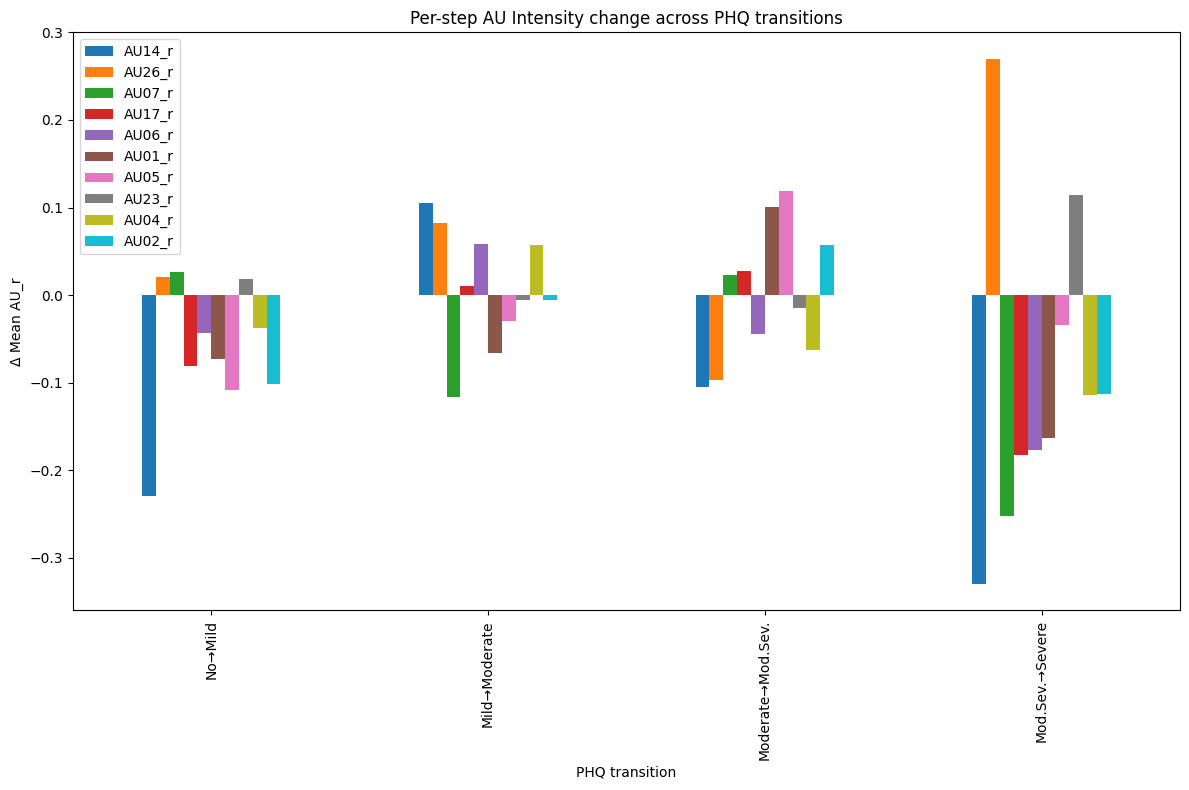

In [7]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

order = [
 "Real images with PHQ-8 score 0-4 (no depression)",
 "Real images with PHQ-8 score 5-9 (mild depression)",
 "Real images with PHQ-8 score 10-14 (moderate depression)",
 "Real images with PHQ-8 score 15-19 (moderately severe depression)",
 "Real images with PHQ-8 score 20-24 (severe depression)",
]
step_labels = ["No→Mild","Mild→Moderate","Moderate→Mod.Sev.","Mod.Sev.→Severe"]

# rows=PHQ, cols=AUs  → transpose so rows=AUs, cols=PHQ
G = pd.read_csv("group_means.csv", index_col=0).reindex(order).T

# Diffs across adjacent PHQ categories (AUs × 5 → AUs × 4 after dropping first NaN column)
D = G.diff(axis=1).iloc[:, 1:]
assert D.shape[1] == 4, f"Expected 4 step columns, got {D.shape[1]}"
D.columns = step_labels

# Show top absolute movers overall (largest |delta| across all steps)
absD = D.abs().stack().sort_values(ascending=False)  # MultiIndex: (AU, step)
top = absD.head(12).index  # 12 biggest changes overall
top_aus = list(dict.fromkeys([au for au, _ in top]))  # preserve order, unique AUs

D_top = D.loc[top_aus]

plt.figure(figsize=(12, 8))
D_top.T.plot(kind="bar", figsize=(12, 8))
plt.title("Per-step AU Intensity change across PHQ transitions")
plt.ylabel("Δ Mean AU_r"); plt.xlabel("PHQ transition")
plt.tight_layout(); plt.show()


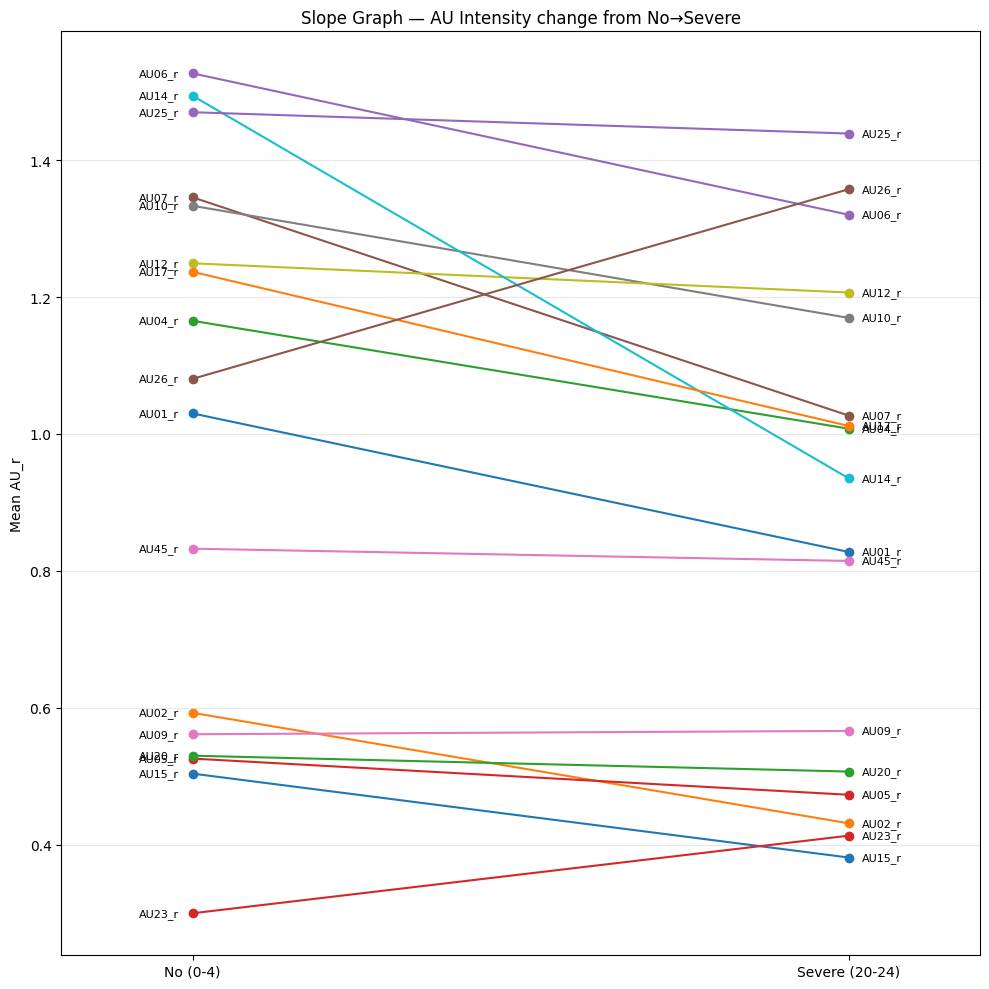

In [8]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

order = [
 "Real images with PHQ-8 score 0-4 (no depression)",
 "Real images with PHQ-8 score 5-9 (mild depression)",
 "Real images with PHQ-8 score 10-14 (moderate depression)",
 "Real images with PHQ-8 score 15-19 (moderately severe depression)",
 "Real images with PHQ-8 score 20-24 (severe depression)",
]

G = pd.read_csv("group_means.csv", index_col=0).reindex(order).T
start = G.iloc[:,0]; end = G.iloc[:,-1]

plt.figure(figsize=(10,10))
y_positions = np.linspace(0, 1, len(G))
for y, au in zip(y_positions, G.index):
    plt.plot([0,1],[start[au], end[au]], marker="o")
    plt.text(-0.02, start[au], au, ha="right", va="center", fontsize=8)
    plt.text(1.02, end[au], f"{au}", ha="left", va="center", fontsize=8)
plt.xticks([0,1], ["No (0-4)","Severe (20-24)"])
plt.title("Slope Graph — AU Intensity change from No→Severe")
plt.ylabel("Mean AU_r"); plt.xlim(-0.2,1.2); plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout(); plt.show()


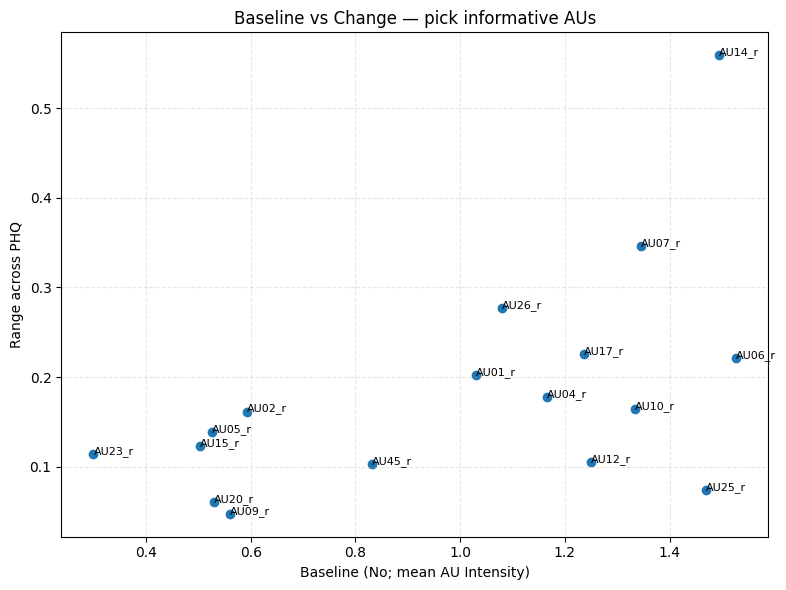

In [9]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

order = [
 "Real images with PHQ-8 score 0-4 (no depression)",
 "Real images with PHQ-8 score 5-9 (mild depression)",
 "Real images with PHQ-8 score 10-14 (moderate depression)",
 "Real images with PHQ-8 score 15-19 (moderately severe depression)",
 "Real images with PHQ-8 score 20-24 (severe depression)",
]

G = pd.read_csv("group_means.csv", index_col=0).reindex(order).T
baseline = G.iloc[:,0]
change = G.max(axis=1) - G.min(axis=1)

plt.figure(figsize=(8,6))
plt.scatter(baseline, change)
for au in G.index:
    plt.text(baseline[au], change[au], au, fontsize=8)
plt.xlabel("Baseline (No; mean AU Intensity)"); plt.ylabel("Range across PHQ")
plt.title("Baseline vs Change — pick informative AUs")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout(); plt.show()


## Heatmap – Normalized AU Intensities Across PHQ Levels

What it shows:
A color-coded matrix where rows are AUs and columns are PHQ categories.
The color represents each AU’s z-scored intensity (how much higher or lower it is compared to that AU’s average).

Why it’s useful:
You can spot patterns and clusters at a glance — e.g., groups of AUs that consistently weaken (cooler colors) or strengthen (warmer colors) with higher PHQ scores.
Normalization removes scale differences so all AUs are comparable.

## Bump Chart – AU Rank Changes Across PHQ Levels

What it shows:
Instead of absolute values, each line tracks an AU’s rank position (1 = highest mean) at each PHQ level.
The vertical movement shows how an AU’s relative prominence among all AUs changes across severity groups.

Why it’s useful:
Highlights which facial actions become more or less dominant as depression severity increases — e.g., AU4_r (“brow lowerer”) moving upward in rank might indicate that frowning becomes a relatively stronger facial cue.

## Waterfall of Deltas – Per-Step AU Changes

What it shows:
A bar chart of the mean change (Δ) in each AU’s intensity between consecutive PHQ categories:

No → Mild

Mild → Moderate

Moderate → Moderately Severe

Moderately Severe → Severe

Each bar shows how much an AU’s expression rises or falls at that specific transition.

Why it’s useful:
Reveals where the largest shifts occur along the depression continuum.
Some AUs may change sharply early (e.g., Mild → Moderate), while others vary only at the extreme end.

## Slope Graph – Start vs End Comparison (No → Severe)

What it shows:
Each AU is represented by a line connecting its mean intensity in the “No depression” and “Severe depression” groups only.
The slope direction (up or down) indicates whether that AU increased or decreased overall.

Why it’s useful:
A clean minimalist summary of net change — which expressions rise or drop from healthy to severe cases, without intermediate categories.
Ideal for highlighting “end-state contrasts.”

## Effect-Size Scatter – Baseline vs Change Magnitude

What it shows:
Each point corresponds to one AU.
The x-axis shows its baseline intensity (No depression), the y-axis shows the total range of change across PHQ levels.

Why it’s useful:
Helps distinguish between AUs that start high but stable (strong expressions that don’t change) and those that are weak but sensitive (small baseline, big relative change).
Great for feature selection or understanding which AUs have both strong signal and discriminative power.

| Plot Type      | Key Insight               | Shows                     | Best for                            |
| -------------- | ------------------------- | ------------------------- | ----------------------------------- |
| Grouped Bar    | Absolute mean intensities | Raw magnitudes            | Comparing AUs within each PHQ group |
| Line (all AUs) | Directional trends        | Rising/falling patterns   | Overall trajectory visualization    |
| Line (top AUs) | Strongest movers          | Condensed, key trends     | Feature sensitivity                 |
| Heatmap        | Pattern overview          | All AUs × all PHQ         | Macro-level patterns                |
| Bump Chart     | Rank shifts               | Relative prominence       | Feature ranking changes             |
| Waterfall      | Step-wise Δ               | Where transitions occur   | Identifying “change points”         |
| Slope Graph    | Start→End change          | Net difference            | Simplicity, summary figure          |
| Scatter        | Baseline vs change        | Effect size vs activation | Feature selection insight           |


Loading all *_OpenFace2.1.0_Pose_gaze_AUs.csv files...
  ↪︎ Skipped sidecar/bad file: C:\Users\jonam\OneDrive\Desktop\Coding\BAProper\Feature Based Model\DAIC-WOZ Data\data\307_P\features\._307_OpenFace2.1.0_Pose_gaze_AUs.csv
  ↪︎ Skipped sidecar/bad file: C:\Users\jonam\OneDrive\Desktop\Coding\BAProper\Feature Based Model\DAIC-WOZ Data\data\308_P\features\._308_OpenFace2.1.0_Pose_gaze_AUs.csv
  ↪︎ Skipped sidecar/bad file: C:\Users\jonam\OneDrive\Desktop\Coding\BAProper\Feature Based Model\DAIC-WOZ Data\data\309_P\features\._309_OpenFace2.1.0_Pose_gaze_AUs.csv
  ↪︎ Skipped sidecar/bad file: C:\Users\jonam\OneDrive\Desktop\Coding\BAProper\Feature Based Model\DAIC-WOZ Data\data\310_P\features\._310_OpenFace2.1.0_Pose_gaze_AUs.csv
  ↪︎ Skipped sidecar/bad file: C:\Users\jonam\OneDrive\Desktop\Coding\BAProper\Feature Based Model\DAIC-WOZ Data\data\311_P\features\._311_OpenFace2.1.0_Pose_gaze_AUs.csv
  ↪︎ Skipped sidecar/bad file: C:\Users\jonam\OneDrive\Desktop\Coding\BAProper\Feature Bas

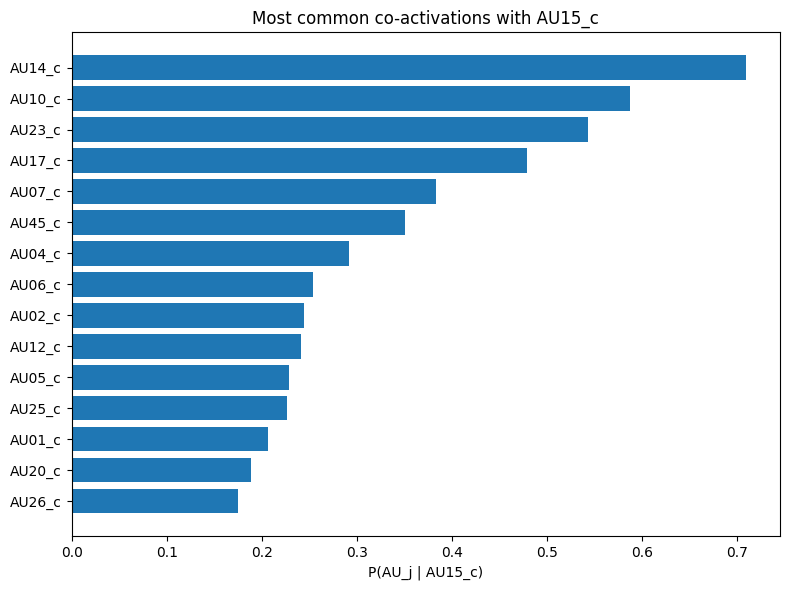

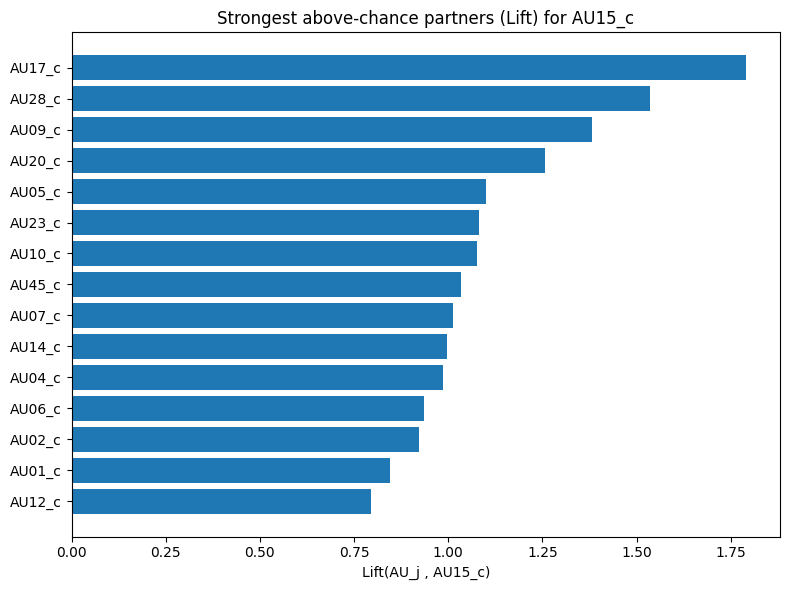

C:\Users\jonam\AppData\Local\Temp\ipykernel_23092\2226764343.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_partners.values, y=top_partners.index, palette="magma")


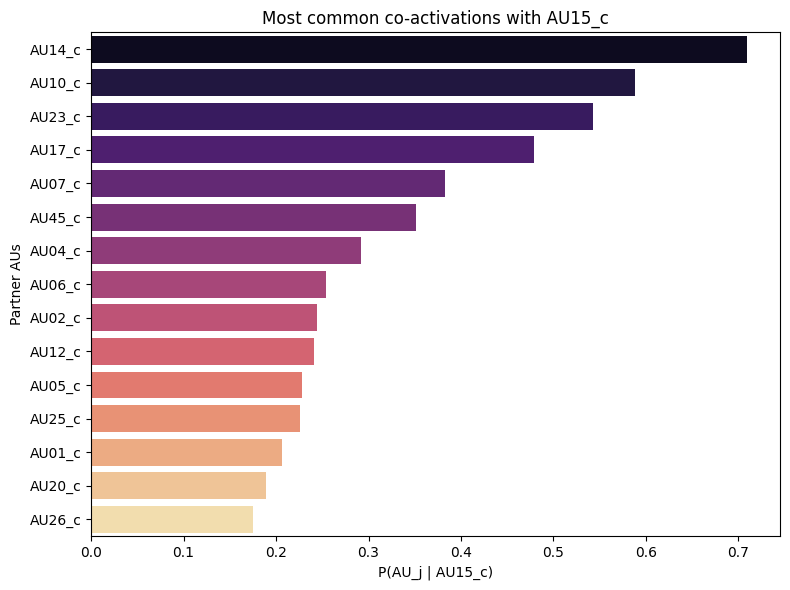

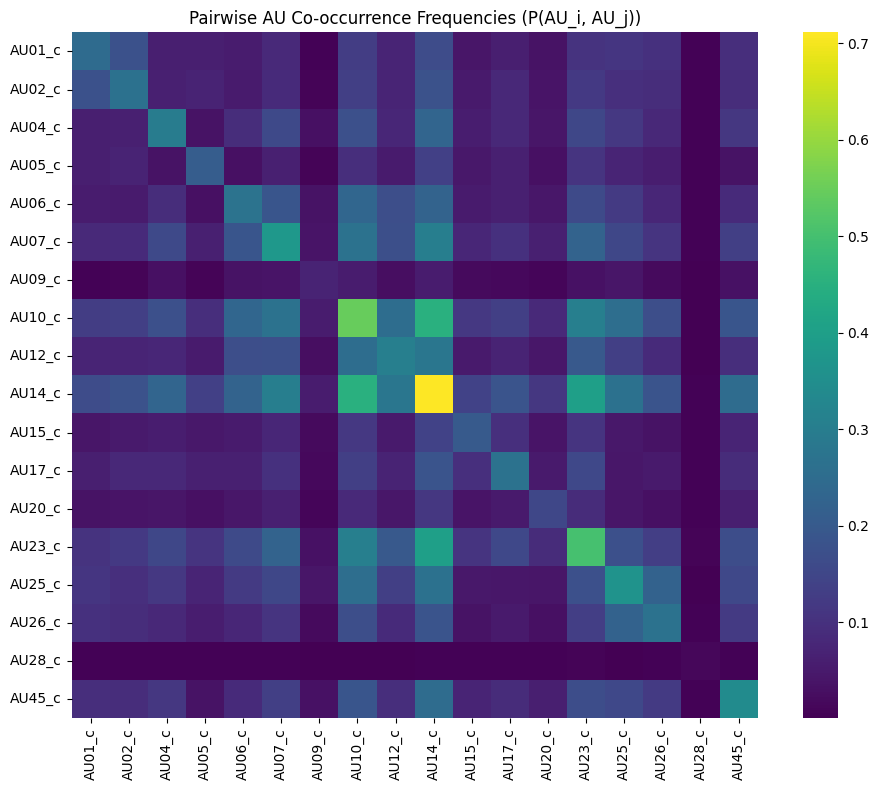

Building co-activation network...


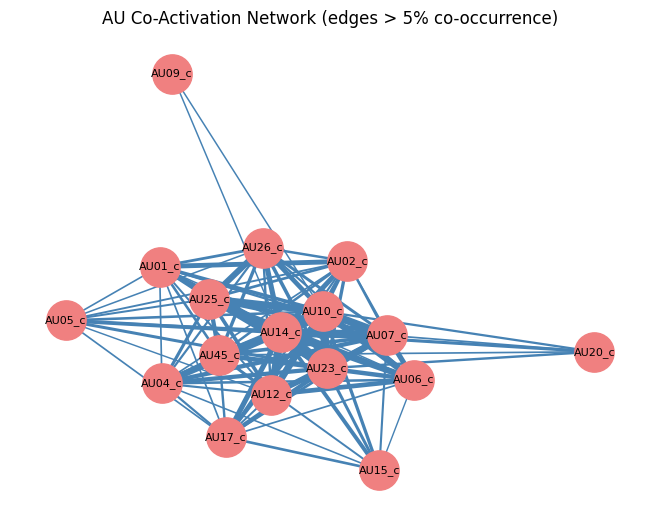

In [3]:
import pandas as pd
import numpy as np
from itertools import combinations
from pathlib import Path
import seaborn as sns
# =========================
# CONFIG
# =========================
DATA_ROOT = Path(r"C:\Users\jonam\OneDrive\Desktop\Coding\BAProper\Feature Based Model\DAIC-WOZ Data\data")
MIN_SUPPORT = 0.01            # ignore AUs active in <1% of frames
MAX_PATIENTS = None           # limit for testing (None = all)
TARGET_AU = "AU15_c"

# =========================
# Robust CSV reader (skips AppleDouble '._' files; tries multiple encodings)
# =========================
def read_csv_safely(path: Path) -> pd.DataFrame | None:
    if path.name.startswith("._"):
        # Skip Apple “resource fork” sidecars
        return None
    encodings = ["utf-8", "utf-8-sig", "cp1252", "latin1"]
    for enc in encodings:
        try:
            return pd.read_csv(path, encoding=enc)
        except UnicodeDecodeError:
            continue
    # Last resort: replace invalid bytes so we don't crash
    try:
        return pd.read_csv(path, encoding="utf-8", errors="replace")
    except Exception as e:
        print(f"⚠️  Hard failure reading {path}: {e}")
        return None

# =========================
# 1) Load all *_c columns across patients
# =========================
print("Loading all *_OpenFace2.1.0_Pose_gaze_AUs.csv files...")
files = sorted(DATA_ROOT.rglob("*_OpenFace2.1.0_Pose_gaze_AUs.csv"))
if MAX_PATIENTS:
    files = files[:MAX_PATIENTS]

dfs = []
for f in files:
    df = read_csv_safely(f)
    if df is None:
        print(f"  ↪︎ Skipped sidecar/bad file: {f}")
        continue
    # keep only AU presence columns (strict AU pattern to avoid pose/gaze)
    au_c = df.filter(regex=r"^AU\d+_c$")
    if au_c.empty:
        print(f"  ↪︎ No AU*_c columns in: {f}")
        continue
    dfs.append(au_c)

if not dfs:
    raise RuntimeError("No usable AU*_c data found. Check paths/filenames.")

data = pd.concat(dfs, ignore_index=True)

# Coerce to numeric then boolean (True if active)
data = data.apply(pd.to_numeric, errors="coerce").fillna(0.0)
bin_data = (data >= 1.0)  # or use > 0.5 if you prefer a threshold

print(f"Total frames: {len(bin_data):,}, AUs: {bin_data.shape[1]}")

# =========================
# 2) Probabilities and co-occurrence
# =========================
# Marginal activation rates P(AU_i)
p_active = bin_data.mean(axis=0)

# Filter AUs with very low support
valid_aus = p_active[p_active > MIN_SUPPORT].index.tolist()
bin_data = bin_data[valid_aus]
p_active = p_active.loc[valid_aus]
AUs = bin_data.columns.tolist()

# Co-occurrence P(AU_i, AU_j)
co_occ = pd.DataFrame(0.0, index=AUs, columns=AUs)
for a, b in combinations(AUs, 2):
    p_ab = (bin_data[a] & bin_data[b]).mean()  # boolean & boolean → boolean
    co_occ.loc[a, b] = co_occ.loc[b, a] = p_ab

# Diagonal = self probability
np.fill_diagonal(co_occ.values, p_active.values)

# Conditional P(b|a) = P(a,b)/P(a)
conditional = co_occ.div(p_active, axis=0).fillna(0.0)

# Lift = P(a,b) / (P(a)P(b))
outer = np.outer(p_active.values, p_active.values)
lift = pd.DataFrame(co_occ.values / outer, index=AUs, columns=AUs)

# ======================================================
# 3. INSPECT ONE TARGET AU
# ======================================================
target = TARGET_AU
if target not in conditional.columns:
    raise ValueError(f"{target} not found in dataset columns.")

partners = conditional.loc[target].sort_values(ascending=False)
print(f"\nTop co-activations for {target}:")
print(partners.head(10).to_string())

# ======================================================
# 4. VISUALIZE CONDITIONALS (TOP PARTNERS)
# ======================================================

# Drop self (always 1.0 and not informative)
partners = partners.drop(index=TARGET_AU, errors="ignore")

top_n = 15
top_partners = partners.head(top_n)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
y_pos = range(len(top_partners))
plt.barh(y_pos, top_partners.values)
plt.yticks(y_pos, top_partners.index)
plt.gca().invert_yaxis()  # largest at top
plt.xlabel(f"P(AU_j | {TARGET_AU})")
plt.title(f"Most common co-activations with {TARGET_AU}")
plt.tight_layout()
plt.show()

# ======================================================
# 5. VISUALIZE TOP PARTNERS BY LIFT (above-chance)
# ======================================================

# Lift > 1 means 'together more than chance'
lift_partners = lift.loc[TARGET_AU].drop(index=TARGET_AU, errors="ignore").sort_values(ascending=False)
top_lift = lift_partners.head(top_n)

plt.figure(figsize=(8, 6))
y_pos = range(len(top_lift))
plt.barh(y_pos, top_lift.values)
plt.yticks(y_pos, top_lift.index)
plt.gca().invert_yaxis()
plt.xlabel(f"Lift(AU_j , {TARGET_AU})")
plt.title(f"Strongest above-chance partners (Lift) for {TARGET_AU}")
plt.tight_layout()
plt.show()


# ======================================================
# 4. VISUALIZE CONDITIONALS (HEATMAP)
# ======================================================
plt.figure(figsize=(8, 6))
top_partners = partners.head(15)
sns.barplot(x=top_partners.values, y=top_partners.index, palette="magma")
plt.title(f"Most common co-activations with {target}")
plt.xlabel(f"P(AU_j | {target})")
plt.ylabel("Partner AUs")
plt.tight_layout()
plt.show()

# ======================================================
# 5. VISUALIZE GLOBAL CO-OCCURRENCE (HEATMAP)
# ======================================================
plt.figure(figsize=(10, 8))
sns.heatmap(co_occ, cmap="viridis", square=True)
plt.title("Pairwise AU Co-occurrence Frequencies (P(AU_i, AU_j))")
plt.tight_layout()
plt.show()

# ======================================================
# 6. (Optional) NETWORK VISUALIZATION
# ======================================================
try:
    import networkx as nx

    print("Building co-activation network...")
    G = nx.Graph()
    for a, b in combinations(AUs, 2):
        weight = co_occ.loc[a, b]
        if weight > 0.05:  # threshold for visibility
            G.add_edge(a, b, weight=weight)

    pos = nx.spring_layout(G, k=0.5, seed=42)
    weights = [G[u][v]['weight'] * 20 for u, v in G.edges()]
    nx.draw(G, pos, with_labels=True, node_size=800, font_size=8,
            width=weights, edge_color="steelblue", node_color="lightcoral")
    plt.title("AU Co-Activation Network (edges > 5% co-occurrence)")
    plt.show()

except ImportError:
    print("Install networkx for network visualization (pip install networkx).")


Building co-activation network...


C:\Users\jonam\AppData\Local\Temp\ipykernel_23092\3215085207.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab10", len(communities))


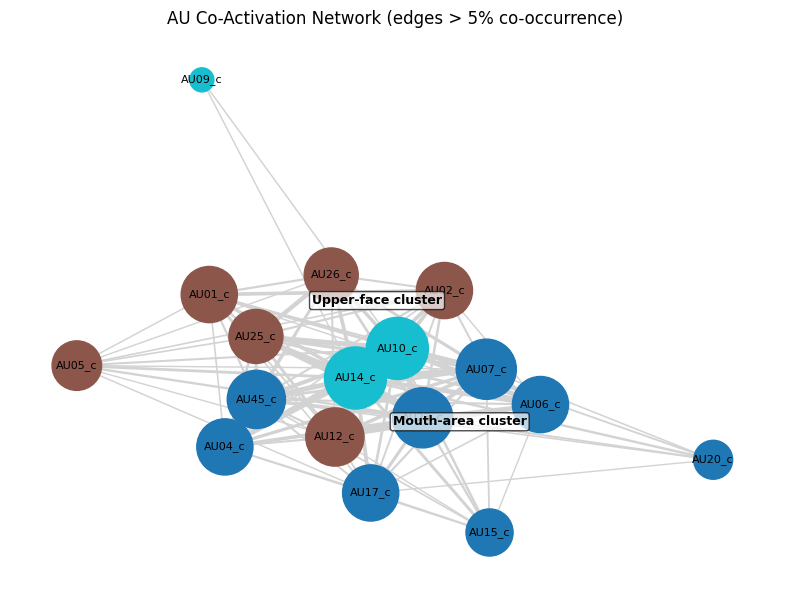

In [5]:
import networkx as nx
from itertools import combinations
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

print("Building co-activation network...")
G = nx.Graph()
for a, b in combinations(AUs, 2):
    weight = co_occ.loc[a, b]
    if weight > 0.05:  # threshold for visibility
        G.add_edge(a, b, weight=weight)

# Layout
pos = nx.spring_layout(G, k=0.5, seed=42)

# --- Node size: degree-based scaling ---
degree_dict = dict(G.degree())
min_deg, max_deg = min(degree_dict.values()), max(degree_dict.values())

node_sizes = []
for n in G.nodes():
    d = degree_dict[n]
    # scale into a reasonable size range, e.g. 300–2000
    size = 300 + (d - min_deg) / (max_deg - min_deg + 1e-9) * 1700
    node_sizes.append(size)

# --- Edge width: proportional to co-activation probability ---
weights = np.array([G[u][v]['weight'] for u, v in G.edges()])
min_w, max_w = weights.min(), weights.max()
edge_widths = 1 + (weights - min_w) / (max_w - min_w + 1e-9) * 5  # 1–6px

# --- Community detection for node colors ---
communities = list(greedy_modularity_communities(G))
community_map = {}
for i, comm in enumerate(communities):
    for node in comm:
        community_map[node] = i

cmap = cm.get_cmap("tab10", len(communities))
node_colors = [cmap(community_map[n]) for n in G.nodes()]

plt.figure(figsize=(8, 6))

# Draw edges first
nx.draw_networkx_edges(
    G, pos,
    width=edge_widths,
    edge_color="lightgrey"
)

# Draw nodes with degree-scaled size and community-based colors
nx.draw_networkx_nodes(
    G, pos,
    node_size=node_sizes,
    node_color=node_colors
)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8)

# --- Annotate node groups (upper-face vs mouth-area) ---
upper_face = {"AU01_c", "AU02_c", "AU04_c", "AU05_c",
              "AU06_c", "AU07_c", "AU09_c"}

mouth_area = {"AU10_c", "AU12_c", "AU14_c", "AU15_c",
              "AU17_c", "AU20_c", "AU23_c", "AU25_c",
              "AU26_c", "AU45_c"}

def annotate_group(nodes, label, dy=0.05):
    pts = np.array([pos[n] for n in nodes if n in pos])
    if len(pts) == 0:
        return
    center = pts.mean(axis=0)
    plt.text(
        center[0], center[1] + dy,
        label,
        fontsize=9,
        fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.7)
    )

annotate_group(upper_face, "Upper-face cluster", dy=0.06)
annotate_group(mouth_area, "Mouth-area cluster", dy=-0.06)

plt.title("AU Co-Activation Network (edges > 5% co-occurrence)")
plt.axis("off")
plt.tight_layout()
plt.show()


Found 283 candidate feature files
  ↪︎ PID 600 not in metadata; skip C:\Users\jonam\OneDrive\Desktop\Coding\BAProper\Feature Based Model\DAIC-WOZ Data\data\600_P\features\600_OpenFace2.1.0_Pose_gaze_AUs.csv
  ↪︎ PID 602 not in metadata; skip C:\Users\jonam\OneDrive\Desktop\Coding\BAProper\Feature Based Model\DAIC-WOZ Data\data\602_P\features\602_OpenFace2.1.0_Pose_gaze_AUs.csv
  ↪︎ PID 604 not in metadata; skip C:\Users\jonam\OneDrive\Desktop\Coding\BAProper\Feature Based Model\DAIC-WOZ Data\data\604_P\features\604_OpenFace2.1.0_Pose_gaze_AUs.csv
  ↪︎ PID 605 not in metadata; skip C:\Users\jonam\OneDrive\Desktop\Coding\BAProper\Feature Based Model\DAIC-WOZ Data\data\605_P\features\605_OpenFace2.1.0_Pose_gaze_AUs.csv
  ↪︎ PID 606 not in metadata; skip C:\Users\jonam\OneDrive\Desktop\Coding\BAProper\Feature Based Model\DAIC-WOZ Data\data\606_P\features\606_OpenFace2.1.0_Pose_gaze_AUs.csv
  ↪︎ PID 607 not in metadata; skip C:\Users\jonam\OneDrive\Desktop\Coding\BAProper\Feature Based Mode

,AU_i,AU_j,P_i,P_j,P_ij,Lift
0,AU10_c,AU14_c,0.539547,0.710925,0.440469,1.148318
1,AU14_c,AU23_c,0.710925,0.484992,0.378123,1.096666
2,AU12_c,AU14_c,0.315673,0.710925,0.290736,1.295500
3,AU07_c,AU14_c,0.370731,0.710925,0.289099,1.096893
4,AU10_c,AU23_c,0.539547,0.484992,0.284759,1.088212
5,AU14_c,AU25_c,0.710925,0.368102,0.264846,1.012050
6,AU07_c,AU10_c,0.370731,0.539547,0.261697,1.308312
7,AU10_c,AU12_c,0.539547,0.315673,0.257398,1.511257
8,AU10_c,AU25_c,0.539547,0.368102,0.256278,1.290373
9,AU14_c,AU45_c,0.710925,0.340958,0.250713,1.034316



Top pairs by Lift (with supports constraints):


,AU_i,AU_j,P_i,P_j,P_ij,Lift
0,AU01_c,AU02_c,0.243681,0.266374,0.175285,2.700426
1,AU25_c,AU26_c,0.368102,0.265495,0.218000,2.230656
2,AU06_c,AU12_c,0.281278,0.315673,0.180085,2.028170
3,AU06_c,AU09_c,0.281278,0.068863,0.036374,1.877874
4,AU06_c,AU07_c,0.281278,0.370731,0.190274,1.824674
5,AU15_c,AU17_c,0.193236,0.264269,0.090790,1.777896
6,AU09_c,AU25_c,0.068863,0.368102,0.041141,1.623002
7,AU06_c,AU10_c,0.281278,0.539547,0.238981,1.574700
8,AU07_c,AU09_c,0.370731,0.068863,0.039974,1.565791
9,AU01_c,AU26_c,0.243681,0.265495,0.098587,1.523849



Top partners for AU15_c by conditional probability P(AU_j | AU15_c):


AU14_c    0.722444
AU10_c    0.577525
AU23_c    0.523767
AU17_c    0.469842
AU07_c    0.375385
AU45_c    0.350744
AU04_c    0.299118
AU06_c    0.267766
AU12_c    0.263637
AU02_c    0.246942
Name: AU15_c, dtype: float64


Top partners for AU15_c by Lift (above-chance association):


AU17_c    1.777896
AU28_c    1.505552
AU09_c    1.380994
AU20_c    1.277767
AU23_c    1.079951
AU10_c    1.070389
AU05_c    1.047990
AU45_c    1.028701
AU14_c    1.016203
AU07_c    1.012555
Name: AU15_c, dtype: float64

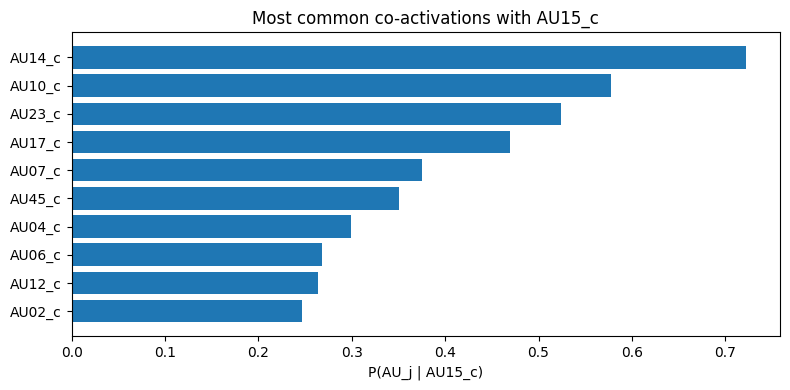

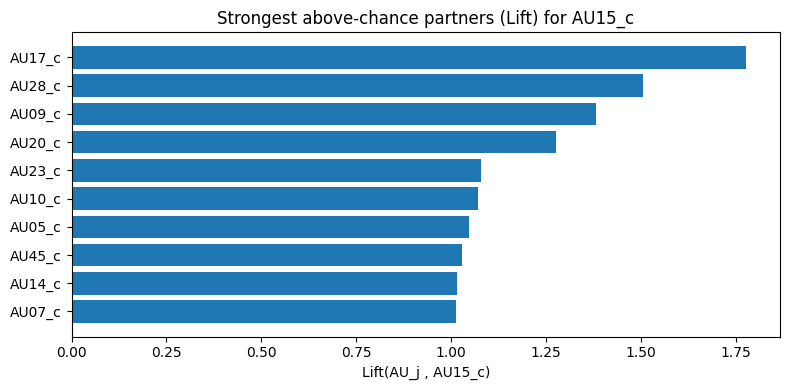

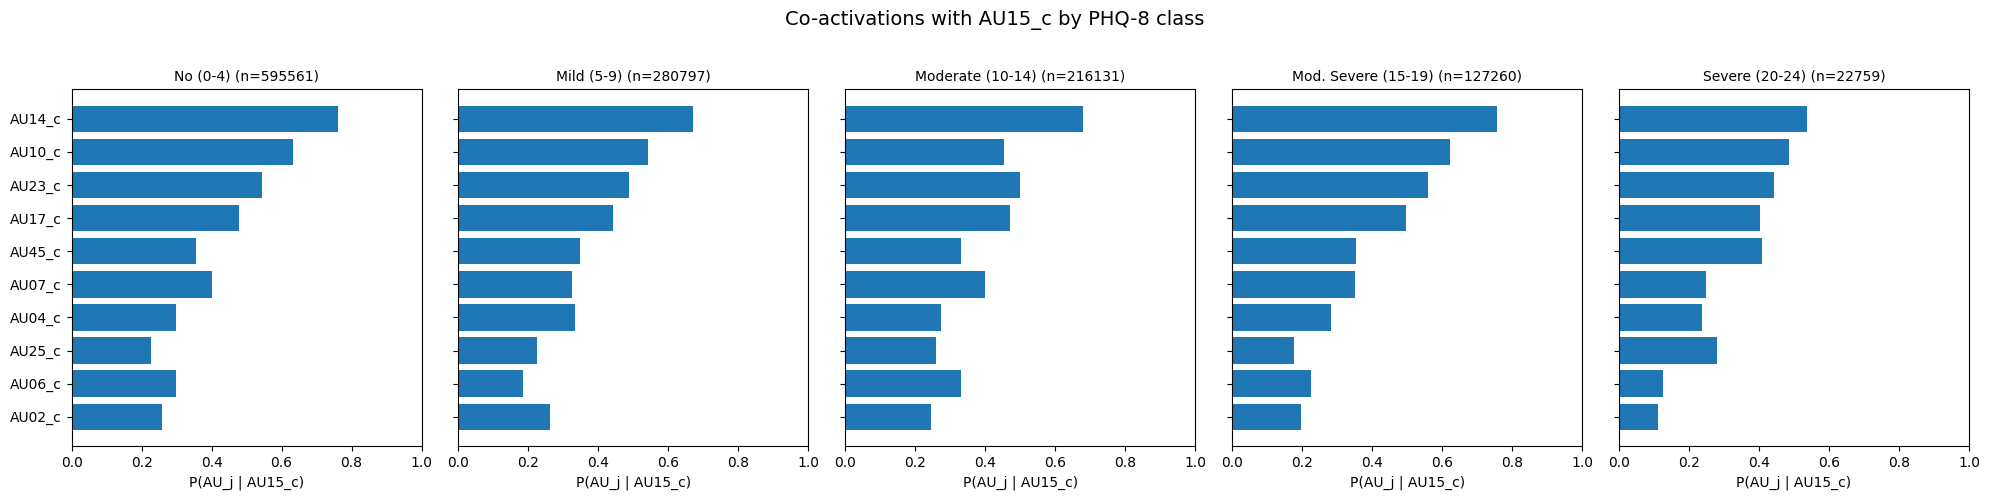

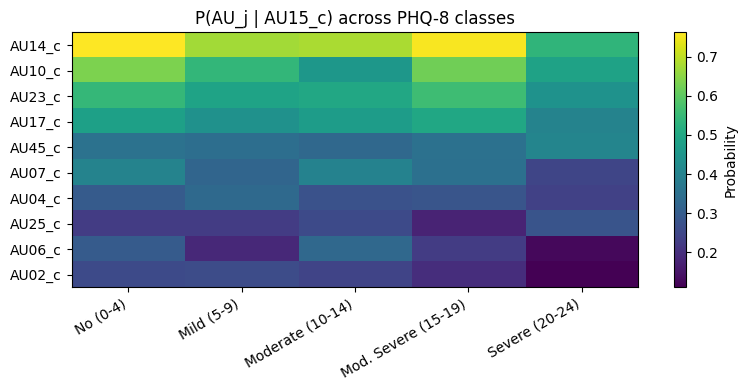

In [1]:
# %% [markdown]
# # AU Co-Occurrence Analysis (Jupyter-Friendly, Hard-Coded)
# - Loads DAIC-WOZ OpenFace AU*_c across all patients
# - Computes global P(AU), P(i,j), P(j|i), Lift
# - Finds Top-K most connected pairs
# - Optional: Target AU partners overall and per PHQ-8 class

# %%
import os
from pathlib import Path
from itertools import combinations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- HARD-CODED PATHS & PARAMS ----------
METADATA_CSV = r"C:\Users\jonam\OneDrive\Desktop\Coding\BAProper\Feature Based Model\DAIC-WOZ Data\metadata_mapped.csv"
DATA_ROOT    = Path(r"C:\Users\jonam\OneDrive\Desktop\Coding\BAProper\Feature Based Model\DAIC-WOZ Data\data")
OUTDIR       = Path(r"C:\Users\jonam\OneDrive\Desktop\Coding\BAProper\Feature Based Model\outputs\cooccurrence")

# global filtering & reporting
TOP_K             = 10
MIN_SUPPORT       = 0.01   # drop AUs with P(AU) < 1%
MIN_PAIR_SUPPORT  = 0.005  # require P(i,j) >= 0.5% for lift ranking
VERBOSE           = True

# optional target AU analysis
TARGET_AU         = "AU15_c"     # set to None to skip target-AU analysis
PER_CLASS_PLOTS   = True

# saving toggles
SAVE_CSVS         = False
SAVE_FIGS         = False

# PHQ binning (hard-coded to your wording)
PHQ_BINS = [
    (0, 4,  "Real images with PHQ-8 score 0-4 (no depression)"),
    (5, 9,  "Real images with PHQ-8 score 5-9 (mild depression)"),
    (10, 14,"Real images with PHQ-8 score 10-14 (moderate depression)"),
    (15, 19,"Real images with PHQ-8 score 15-19 (moderately severe depression)"),
    (20, 24,"Real images with PHQ-8 score 20-24 (severe depression)"),
]
CATEGORY_ORDER = [label for _,_,label in PHQ_BINS]
CATEGORY_SHORT = ["No (0-4)","Mild (5-9)","Moderate (10-14)","Mod. Severe (15-19)","Severe (20-24)"]
CAT_SHORT_MAP  = dict(zip(CATEGORY_ORDER, CATEGORY_SHORT))

OUTDIR.mkdir(parents=True, exist_ok=True)
plt.rcParams["figure.dpi"] = 100
# %%
def phq_to_category(score: float) -> str:
    s = float(score)
    if not (0 <= s <= 24):
        raise ValueError(f"PHQ_Score {s} out of [0,24]")
    for lo, hi, label in PHQ_BINS:
        if lo <= s <= hi:
            return label
    raise ValueError(f"PHQ_Score {s} did not match any bin")

def read_csv_safely(path: Path) -> pd.DataFrame | None:
    """Skip Apple sidecars and try multiple encodings; last-resort 'errors=replace'."""
    if path.name.startswith("._"):
        return None
    for enc in ("utf-8","utf-8-sig","cp1252","latin1"):
        try:
            return pd.read_csv(path, encoding=enc)
        except UnicodeDecodeError:
            continue
    try:
        return pd.read_csv(path, encoding="utf-8", errors="replace")
    except Exception:
        return None

def compute_prob_mats(bin_df: pd.DataFrame):
    """bin_df: boolean DataFrame (frames × AU*_c). Returns (p_active, co_occ, conditional, lift)."""
    AUs = bin_df.columns.tolist()
    p_active = bin_df.mean(axis=0)

    co_occ = pd.DataFrame(0.0, index=AUs, columns=AUs)
    np.fill_diagonal(co_occ.values, p_active.values)
    for a, b in combinations(AUs, 2):
        p_ab = (bin_df[a] & bin_df[b]).mean()
        co_occ.loc[a, b] = co_occ.loc[b, a] = p_ab

    conditional = co_occ.div(p_active.replace(0, np.nan), axis=0)
    outer = np.outer(p_active.values, p_active.values)
    with np.errstate(divide='ignore', invalid='ignore'):
        lift = np.divide(co_occ.values, outer, out=np.full_like(co_occ.values, np.nan), where=outer>0)
    lift = pd.DataFrame(lift, index=AUs, columns=AUs)
    return p_active, co_occ, conditional, lift

def top_connected_pairs(co_occ: pd.DataFrame, p_active: pd.Series,
                        top_k=TOP_K, min_support=MIN_SUPPORT, min_pair_support=MIN_PAIR_SUPPORT):
    rows = []
    for a, b in combinations(co_occ.index.tolist(), 2):
        pij = co_occ.loc[a, b]
        pi, pj = p_active.loc[a], p_active.loc[b]
        lift = pij / (pi*pj) if pi>0 and pj>0 else np.nan
        rows.append((a, b, pi, pj, pij, lift))
    df = pd.DataFrame(rows, columns=["AU_i","AU_j","P_i","P_j","P_ij","Lift"])

    top_by_freq = df.sort_values("P_ij", ascending=False).head(top_k).reset_index(drop=True)
    mask = (df["P_i"] >= min_support) & (df["P_j"] >= min_support) & (df["P_ij"] >= min_pair_support)
    top_by_lift = df[mask].sort_values("Lift", ascending=False).head(top_k).reset_index(drop=True)
    return top_by_freq, top_by_lift

def plot_barh(series: pd.Series, xlabel: str, title: str, outpath: Path | None = None):
    s = series.dropna()
    plt.figure(figsize=(8, max(4, 0.35*len(s))))
    y = range(len(s))
    plt.barh(y, s.values)
    plt.yticks(y, s.index)
    plt.gca().invert_yaxis()
    plt.xlabel(xlabel)
    plt.title(title)
    plt.tight_layout()
    if outpath and SAVE_FIGS:
        plt.savefig(outpath, dpi=300)
    plt.show()

def plot_per_class_panels(partners_top: pd.DataFrame, counts_target_by_class: dict, target_au: str, outpath: Path | None = None):
    top_names = list(partners_top.index)
    fig, axes = plt.subplots(1, 5, figsize=(20, max(5, 0.35*len(top_names))), sharex=False, sharey=True)
    for ax, cat in zip(axes, CATEGORY_ORDER):
        s = partners_top[cat]
        title = f"{CAT_SHORT_MAP[cat]} (n={counts_target_by_class.get(cat,0)})"
        ax.barh(range(len(top_names)), s.values)
        ax.set_yticks(range(len(top_names)))
        ax.set_yticklabels(top_names)
        ax.invert_yaxis()
        ax.set_title(title, fontsize=10)
        ax.set_xlabel(f"P(AU_j | {target_au})")
        ax.set_xlim(0.0, 1.0)
    plt.suptitle(f"Co-activations with {target_au} by PHQ-8 class", fontsize=14, y=0.99)
    plt.tight_layout(rect=[0,0,1,0.97])
    if outpath and SAVE_FIGS:
        plt.savefig(outpath, dpi=300)
    plt.show()

def plot_heatmap_matrix(matrix: pd.DataFrame, title: str, outpath: Path | None = None):
    arr = matrix.values
    plt.figure(figsize=(8, max(4, 0.35*arr.shape[0])))
    plt.imshow(arr, aspect="auto")
    plt.yticks(range(arr.shape[0]), matrix.index)
    plt.xticks(range(arr.shape[1]), [CAT_SHORT_MAP.get(c, c) for c in matrix.columns], rotation=30, ha="right")
    plt.title(title)
    cbar = plt.colorbar()
    cbar.set_label("Probability")
    plt.tight_layout()
    if outpath and SAVE_FIGS:
        plt.savefig(outpath, dpi=300)
    plt.show()
# %%
# --- Load metadata ---
meta = pd.read_csv(METADATA_CSV)
assert {"Participant_ID","PHQ_Score"}.issubset(meta.columns), "metadata CSV must have Participant_ID and PHQ_Score"
meta["PHQ_Category"] = meta["PHQ_Score"].apply(phq_to_category)
pid_to_cat = dict(zip(meta["Participant_ID"].astype(int), meta["PHQ_Category"]))

# --- Load all AU*_c frames across patients ---
files = sorted(DATA_ROOT.rglob("*_OpenFace2.1.0_Pose_gaze_AUs.csv"))
if VERBOSE:
    print(f"Found {len(files)} candidate feature files")

frames = []
skipped_sidecar = 0
unreadable = 0

for f in files:
    if f.name.startswith("._"):
        skipped_sidecar += 1
        continue

    # infer PID
    pid = None
    try:
        pid = int(f.stem.split("_")[0])
    except Exception:
        try:
            pid = int(f.parent.parent.name.split("_")[0])
        except Exception:
            unreadable += 1
            if VERBOSE: print(f"  ↪︎ could not infer PID for {f}, skipping")
            continue

    if pid not in pid_to_cat:
        if VERBOSE: print(f"  ↪︎ PID {pid} not in metadata; skip {f}")
        continue

    df = read_csv_safely(f)
    if df is None:
        unreadable += 1
        if VERBOSE: print(f"  ↪︎ unreadable: {f}")
        continue

    au_c = df.filter(regex=r"^AU\d+_c$")
    if au_c.empty:
        if VERBOSE: print(f"  ↪︎ No AU*_c columns in: {f}")
        continue

    au_c = au_c.apply(pd.to_numeric, errors="coerce").fillna(0.0)
    au_c = (au_c >= 1.0)              # boolean: active if >=1
    au_c["PHQ_Category"] = pid_to_cat[pid]
    frames.append(au_c)

if VERBOSE:
    print(f"Skipped sidecars: {skipped_sidecar}, unreadable: {unreadable}")

assert frames, "No usable AU*_c frames found. Check paths and file content."
all_frames = pd.concat(frames, ignore_index=True)

# keep AU columns
au_cols = [c for c in all_frames.columns if c.endswith("_c") and c != "PHQ_Category"]
support = all_frames[au_cols].mean()
keep_aus = support[support >= MIN_SUPPORT].index.tolist()
if VERBOSE:
    print(f"Kept {len(keep_aus)}/{len(au_cols)} AUs with P(AU) >= {MIN_SUPPORT:.3f}")

bin_global = all_frames[keep_aus].copy()
print(f"Total frames: {len(bin_global):,}, AUs: {bin_global.shape[1]}")
# %%
# --- Global probability matrices ---
p_active, co_occ, conditional, lift = compute_prob_mats(bin_global)

if SAVE_CSVS:
    (OUTDIR / "global_p_active.csv").write_text(p_active.to_csv(header=["P(AU)"]))
    co_occ.to_csv(OUTDIR / "global_co_occurrence.csv")
    conditional.to_csv(OUTDIR / "global_conditional.csv")
    lift.to_csv(OUTDIR / "global_lift.csv")

# --- Top connected pairs (global) ---
top_by_freq, top_by_lift = top_connected_pairs(
    co_occ, p_active, top_k=TOP_K, min_support=MIN_SUPPORT, min_pair_support=MIN_PAIR_SUPPORT
)

print("\nTop pairs by joint frequency P(i,j):")
display(top_by_freq)
print("\nTop pairs by Lift (with supports constraints):")
display(top_by_lift)

if SAVE_CSVS:
    top_by_freq.to_csv(OUTDIR / "top_pairs_by_frequency.csv", index=False)
    top_by_lift.to_csv(OUTDIR / "top_pairs_by_lift.csv", index=False)
# %%
if TARGET_AU is not None:
    assert TARGET_AU in bin_global.columns, f"{TARGET_AU} not found among kept AUs"

    partners_cond = conditional.loc[TARGET_AU].drop(index=TARGET_AU, errors="ignore").sort_values(ascending=False)
    partners_lift = lift.loc[TARGET_AU].drop(index=TARGET_AU, errors="ignore").sort_values(ascending=False)

    print(f"\nTop partners for {TARGET_AU} by conditional probability P(AU_j | {TARGET_AU}):")
    display(partners_cond.head(max(10, TOP_K)))

    print(f"\nTop partners for {TARGET_AU} by Lift (above-chance association):")
    display(partners_lift.head(max(10, TOP_K)))

    # Plots
    plot_barh(
        partners_cond.head(max(10, TOP_K)),
        xlabel=f"P(AU_j | {TARGET_AU})",
        title=f"Most common co-activations with {TARGET_AU}",
        outpath=OUTDIR / f"{TARGET_AU}_top_partners_conditional.png"
    )
    plot_barh(
        partners_lift.head(max(10, TOP_K)),
        xlabel=f"Lift(AU_j , {TARGET_AU})",
        title=f"Strongest above-chance partners (Lift) for {TARGET_AU}",
        outpath=OUTDIR / f"{TARGET_AU}_top_partners_lift.png"
    )
# %%
if TARGET_AU is not None and PER_CLASS_PLOTS:
    partners_by_class = {}
    counts_target_by_class = {}

    for cat in CATEGORY_ORDER:
        dfc = all_frames[all_frames["PHQ_Category"] == cat]
        if dfc.empty or TARGET_AU not in dfc.columns:
            partners_by_class[cat] = pd.Series(dtype=float)
            counts_target_by_class[cat] = 0
            continue
        mask = dfc[TARGET_AU]
        n_target = int(mask.sum())
        counts_target_by_class[cat] = n_target
        if n_target == 0:
            partners_by_class[cat] = pd.Series(index=keep_aus, dtype=float)
        else:
            cond = dfc.loc[mask, keep_aus].mean(axis=0)
            cond = cond.drop(index=TARGET_AU, errors="ignore")
            partners_by_class[cat] = cond

    all_partner_names = sorted(set().union(*[s.dropna().index for s in partners_by_class.values()]))
    partners_mat = pd.DataFrame(index=all_partner_names, columns=CATEGORY_ORDER, dtype=float)
    for cat, s in partners_by_class.items():
        partners_mat[cat] = s.reindex(all_partner_names)

    overall_rank = partners_mat.mean(axis=1).sort_values(ascending=False)
    top_names = overall_rank.head(max(10, TOP_K)).index.tolist()
    partners_top = partners_mat.loc[top_names]

    plot_per_class_panels(
        partners_top,
        counts_target_by_class,
        target_au=TARGET_AU,
        outpath=OUTDIR / f"{TARGET_AU}_per_class_panels.png"
    )
    plot_heatmap_matrix(
        partners_top.rename(columns=CAT_SHORT_MAP),
        title=f"P(AU_j | {TARGET_AU}) across PHQ-8 classes",
        outpath=OUTDIR / f"{TARGET_AU}_per_class_heatmap.png"
    )


In [2]:
# ============================================
# Trio Co-occurrence + Network Visualization
# ============================================
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# ---------------- CONFIG ----------------
THRESHOLD = 0.5      # intensity threshold for "active" AU
TOP_K_TRIPLES = 20   # how many strongest trios to show in bar plot & highlight in network
MIN_PAIR_COUNT = 10  # minimum co-activation count for a pair to be drawn in the network
# ----------------------------------------

# 1) Select AU columns and binarize
AUs = [c for c in df.columns if c.startswith("AU") and c.endswith("_r")]
bin_mat = (df[AUs] > THRESHOLD).astype(int)
n_frames = len(bin_mat)
print(f"Using {len(AUs)} AUs, {n_frames} frames; threshold = {THRESHOLD}")

# 2) Triple co-occurrence: counts and probabilities
def compute_triple_cooccurrence(bin_mat):
    aus = list(bin_mat.columns)
    triples = []

    for a, b, c in itertools.combinations(aus, 3):
        # frames where all three AUs are active
        count = (bin_mat[a] & bin_mat[b] & bin_mat[c]).sum()
        if count > 0:
            triples.append((a, b, c, count))

    df_triples = pd.DataFrame(triples, columns=["AU1", "AU2", "AU3", "count"])
    df_triples["prob"] = df_triples["count"] / len(bin_mat)
    df_triples = df_triples.sort_values("count", ascending=False)
    return df_triples

df_triples = compute_triple_cooccurrence(bin_mat)
print(f"Non-zero trios: {len(df_triples)}")

# 3) Bar plot of strongest trios
def plot_top_triples_bar(df_triples, top_k=20):
    top = df_triples.head(top_k).copy()
    labels = [f"{r.AU1}, {r.AU2}, {r.AU3}" for _, r in top.iterrows()]

    plt.figure(figsize=(10, 6))
    y_pos = np.arange(len(top))
    plt.barh(y_pos, top["count"])
    plt.yticks(y_pos, labels, fontsize=8)
    plt.gca().invert_yaxis()
    plt.xlabel("Co-activation count (frames)")
    plt.title(f"Top {top_k} AU trios by co-occurrence")
    plt.grid(axis="x", alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_top_triples_bar(df_triples, TOP_K_TRIPLES)

display(df_triples.head(TOP_K_TRIPLES))  # optional: see numbers as a table

# 4) Pairwise co-occurrence (for network edges)
#    pair_counts[i,j] = number of frames where AU_i and AU_j are active
pair_counts = bin_mat.T @ bin_mat
pair_counts.values[np.tril_indices_from(pair_counts)] = 0  # keep only upper triangle for convenience

# 5) Network graph: nodes = AUs, edges = co-activation,
#    highlight edges that appear in top-K trios
def plot_au_network(pair_counts, df_triples, top_k_triples=20, min_pair_count=10):
    # Build graph
    G = nx.Graph()
    aus = list(pair_counts.index)

    # Add nodes
    for au in aus:
        G.add_node(au)

    # Add edges based on pairwise co-occurrence
    for i, au_i in enumerate(aus):
        for j, au_j in enumerate(aus):
            if j <= i:
                continue
            w = pair_counts.loc[au_i, au_j]
            if w >= min_pair_count:
                G.add_edge(au_i, au_j, weight=w)

    # Determine which edges belong to strongest trios
    top_trios = df_triples.head(top_k_triples)
    trio_edges = set()
    for _, row in top_trios.iterrows():
        a, b, c = row["AU1"], row["AU2"], row["AU3"]
        trio_edges.add(tuple(sorted((a, b))))
        trio_edges.add(tuple(sorted((a, c))))
        trio_edges.add(tuple(sorted((b, c))))

    # Layout
    pos = nx.spring_layout(G, seed=0, k=0.7)

    # Edge weights for width scaling
    edges = G.edges()
    weights = np.array([G[u][v]["weight"] for u, v in edges], dtype=float)
    if len(weights) > 0:
        # normalize widths
        w_min, w_max = weights.min(), weights.max()
        widths = 1.0 + 4.0 * (weights - w_min) / (w_max - w_min + 1e-9)
    else:
        widths = []

    # Split edges into "highlighted" (part of top trios) vs normal
    highlight_edges = []
    normal_edges = []
    highlight_widths = []
    normal_widths = []

    for (edge, w) in zip(edges, widths):
        e_sorted = tuple(sorted(edge))
        if e_sorted in trio_edges:
            highlight_edges.append(edge)
            highlight_widths.append(w * 1.4)  # slightly thicker
        else:
            normal_edges.append(edge)
            normal_widths.append(w)

    plt.figure(figsize=(9, 9))
    # Draw normal edges
    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=normal_edges,
        width=normal_widths,
        edge_color="lightgray",
        alpha=0.7,
    )
    # Draw highlighted edges
    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=highlight_edges,
        width=highlight_widths,
        edge_color="tab:red",
        alpha=0.9,
    )
    # Draw nodes and labels
    nx.draw_networkx_nodes(
        G,
        pos,
        node_size=800,
        node_color="white",
        edgecolors="black",
    )
    nx.draw_networkx_labels(G, pos, font_size=9)

    plt.title(
        f"AU co-occurrence network\n"
        f"edges ≥ {min_pair_count} frames; red edges participate in top {top_k_triples} trios"
    )
    plt.axis("off")
    plt.tight_layout()
    plt.show()

plot_au_network(pair_counts, df_triples,
                top_k_triples=TOP_K_TRIPLES,
                min_pair_count=MIN_PAIR_COUNT)


NameError: name 'df' is not defined